#  Novel Time Series Primitive that Allows Real World Classification

## Contrast Profile

The tutorial is adapted from the [Matrix Profile XXIII paper](https://www.cs.ucr.edu/~eamonn/ContrastProfile_V048_names.pdf).  

Subsequence’s distance to its nearest neighbor within the same 
dataset can be represented by the [Matrix Profile](https://stumpy.readthedocs.io/en/latest/Tutorial_The_Matrix_Profile.html).  

Small values in the Matrix Profile are called *motifs*, and large values are called *discords*.

It may be usefull to score subsequences with
1. close to nearest neighbor in certain data 
2. far from its nearest neighbor in other **black-listed** data

We give a visual intuition of the property of interest.

<img src="images\contrast_profile_concept.png" width=400>

Fig1. Visual intuition of our interest. Blue is **target** class, red is **non-target** class.


- [Point A: **discord**] is **far** from its nearest neighbor in the **non-target** class,  
    but it is also **far** from its nearest neighbor within its own target class.  
    It is an anomaly that would score highly on the definition of time series discord

- [Point B: **motif**] in contrast is **very close** to its nearest neighbor in the **target** class,  
    but it is also **close** to its nearest neighbors in **non-target** class.  
    This point would score highly on the definition of time series motif.

- [Point C: **our interest**] is both very **far** from its nearest neighbor in the **non-target** class  
    and very **close** to its nearest neighbor in the **target** class.  
    This is exactly the property we desire.

We call this property(our interest) **Contrast**, and the vector that represents it the **Contrast Profile**.  

## Getting Started
Let's import the packages that we'll need to load, analyze, and plot the data.

In [1]:
import stumpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('https://raw.githubusercontent.com/TDAmeritrade/stumpy/main/docs/stumpy.mplstyle')

## Loading the ECG data
Let's walk through by running example of a noisy electrocardiogram(ECG).  

We proposed to compute the Contrast Profile **only when we belive that the two following assumptions are likely to be true:**
- 𝐓(+): contains  **at  least  two  instances**  that  are  unique  to the phenomena of interest. 
- 𝐓(−): contains **zero instances of interest**.  

From the dataset, we extract two snippet(v_pos:T(+) and v_neg:T(-)), define index of desired instances on the purpose.  
Those are around 27-second snippet.  
T(+) requires at least two desired instances. At this time, T(+) has its instances.

In [17]:
ecg_df = pd.read_csv("14172m.csv", index_col=0).astype(float) 
ecg_df.head()

,0,1
0,12.0,-12.0
1,10.0,-14.0
2,10.0,-12.0
3,14.0,-10.0
4,18.0,-4.0


In [ ]:
# T(+)
v_pos = ecg_df.iloc[64630:68129, 1].values
# T(-)
v_neg = ecg_df.iloc[69880:73379, 1].values

# subsequence length
m = 128  
# desired instances indices
idx_desired0, idx_desired1 = 550, 2030

## Visualizing the ECG snippets with desired instances.

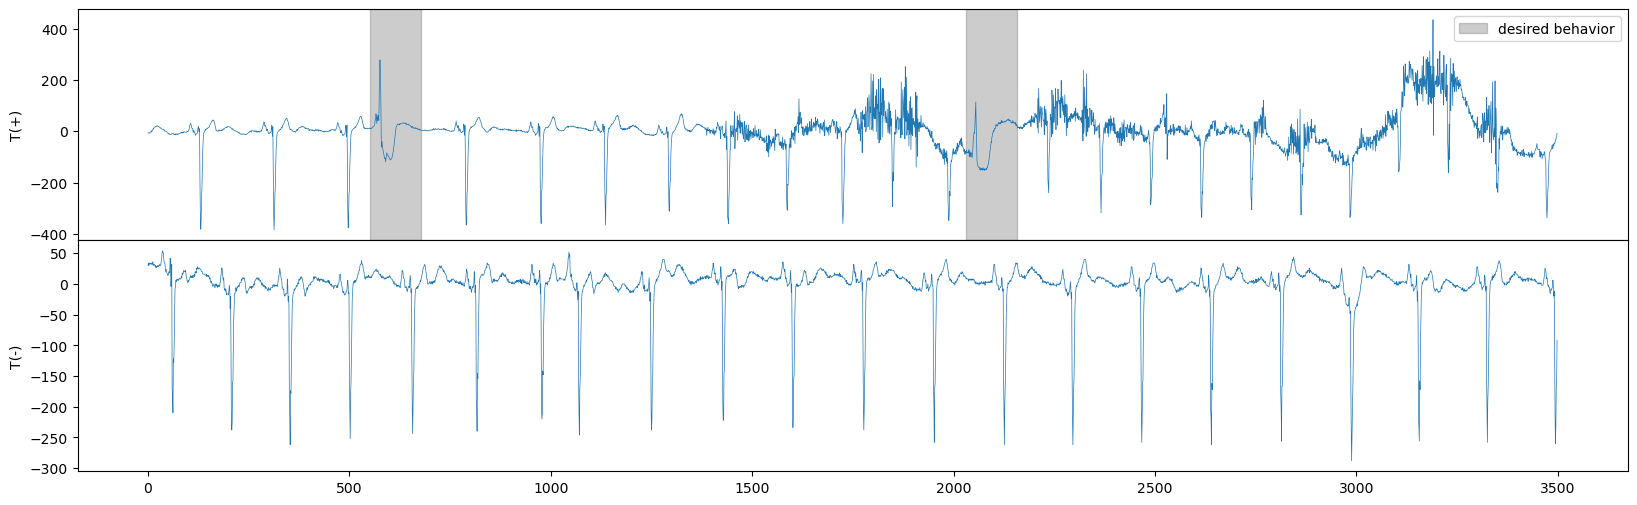

In [ ]:
fig, axis = plt.subplots(2, 1, gridspec_kw={"hspace":0})
axis[0].plot(v_pos, linewidth=0.5)
axis[1].plot(v_neg, linewidth=0.5)
axis[0].axvspan(idx_desired0, idx_desired0+m, color="grey", alpha=0.4, label="desired instances")
axis[0].axvspan(idx_desired1, idx_desired1+m, color="grey", alpha=0.4)
axis[0].set_ylabel("T(+)")
axis[1].set_ylabel("T(-)")
axis[0].legend(loc=1)

plt.show()

Upper fig : T(+) looks noisy, 𝐓(+) has to include contains  **at  least  two  instances**. Signals on grey area are two "desired instances" which are similar.  
Bottom fig : T(-) looks clean, much more regular repeated pattern. Because T(-) has to be **zero instances of interest**.